# Homework 2. Social network analysis
### *Александр Анисимов, https://github.com/sanisimov98/networks_dh_2020*

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import collections
import math
import numpy as np
from networkx.relabel import relabel_nodes
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman

### Сбор и очистка данных:

In [2]:
nodes = pd.read_csv('./nodes.csv', sep = ',') #таблица узлов
edges = pd.read_csv('./edges.csv', sep = ',') #таблица рёбер

In [3]:
edges.head()

Source    Target      Type  Id  Label  timeset  Weight
0  606935  11995332  Directed   1    NaN      NaN       1
1  606935  27835117  Directed   2    NaN      NaN       1
2  606935  31918619  Directed   3    NaN      NaN       1
3  606935  48920357  Directed   4    NaN      NaN       1
4  606935  58591324  Directed   5    NaN      NaN       1

In [4]:
nodes.head()

Id               Label  timeset          0           1    2  \
0   606935       Анна Ковалова      NaN       Анна    Ковалова  NaN   
1  1687066   Герман Германович      NaN     Герман  Германович  NaN   
2  1880860  Дмитрий Шапошников      NaN    Дмитрий  Шапошников  NaN   
3  1895348    Даниил Скоринкин      NaN     Даниил   Скоринкин  NaN   
4  3962774    Екатерина Лымарь      NaN  Екатерина      Лымарь  NaN   

                   3  4                                                  5  \
0           id606935  1  https://sun1-16.userapi.com/impf/c841321/v8413...   
1  germangermanovich  2  https://sun1-85.userapi.com/impg/_8h3cY4LZZyJi...   
2          dmitriysh  2  https://sun1-25.userapi.com/impf/c853428/v8534...   
3          id1895348  2  https://sun1-93.userapi.com/impg/6f3l6-MGO61hY...   
4         lymar_kate  1  https://sun1-47.userapi.com/impf/7_oi1f9HUqxbu...   

     6   7   8          9  10  
0  0.0 NaN NaN   5.6.2006 NaN  
1  0.0 NaN NaN  17.3.1990 NaN  
2  0.0 NaN NaN        3.1 NaN  
3  0.0 NaN NaN        NaN NaN  
4  NaN NaN NaN        5.5 NaN

In [5]:
labels_and_ids = {}
for i, node in enumerate(nodes['Id']):
    labels_and_ids[node] = nodes['Label'][i]

In [6]:
# чтобы не было удалённых аккаунтов
to_delete = []
for key, value in labels_and_ids.items():
    if value == 'DELETED ':
        print(key)
        to_delete.append(key)
        
for item in to_delete:
    del labels_and_ids[item]

10038725
29318531
30637530
53015795
138296578
143018151
208742453
269660736


In [7]:
G = nx.Graph() ##использую неориентированный граф: если люди друзья, то очевидно, что связь будет двусторонней

In [8]:
for i, node in enumerate(edges['Source']):
    if node not in to_delete:
        if edges['Target'][i] not in to_delete:
            target = edges['Target'][i]
            G.add_edge(node, target)

In [9]:
G = nx.relabel_nodes(G, labels_and_ids)

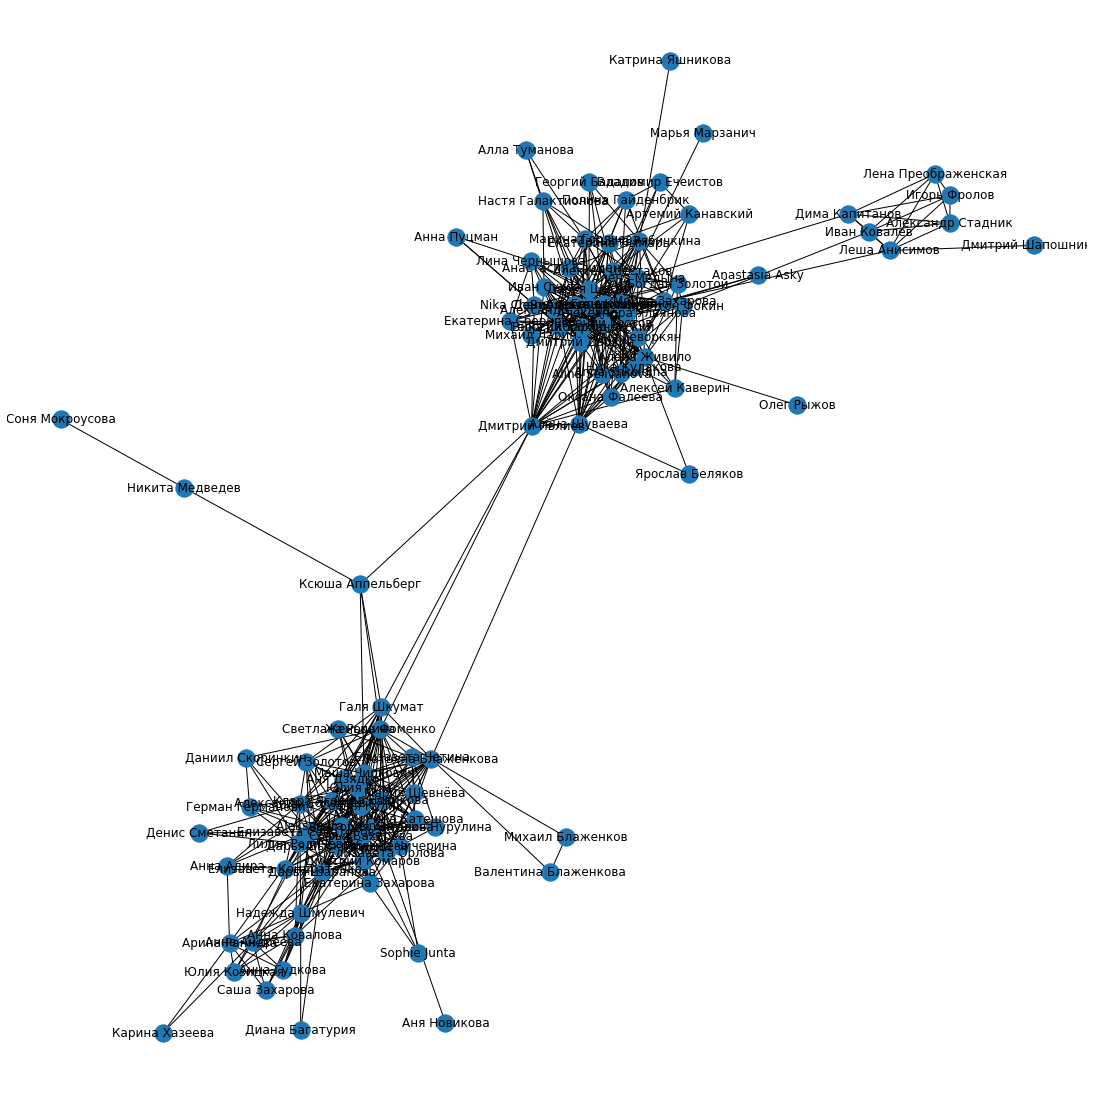

In [13]:
#общий ориентированный граф со spring_layout
pos = nx.spring_layout(G)
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True)

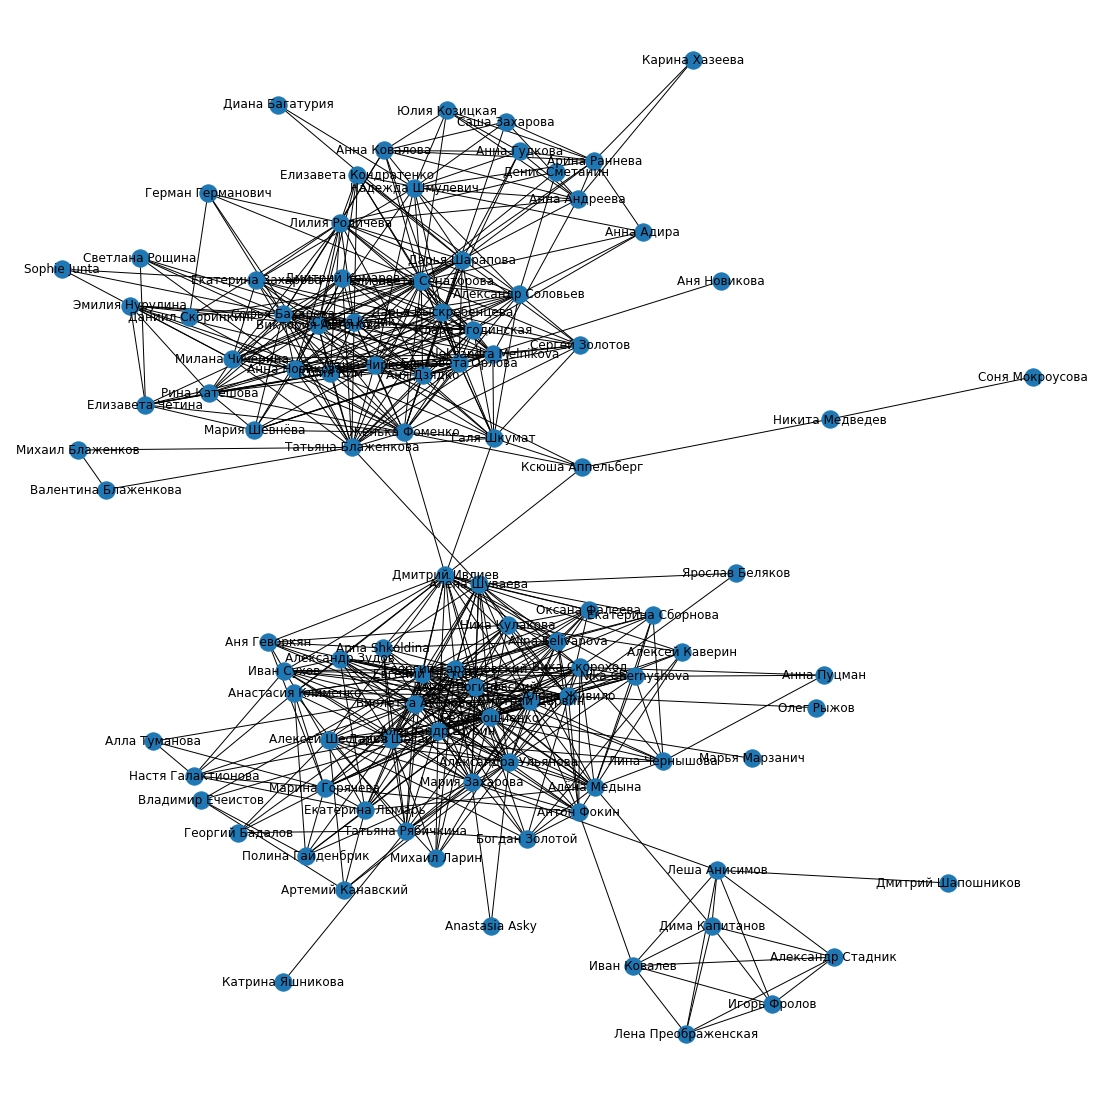

In [14]:
#общий ориентированный граф с kamada_kawai_layout 
#(кажется, читается чуть проще, так что дальше буду использовать такой вариант укладки)
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=(15, 15))
nx.draw(G, pos, with_labels=True)

In [15]:
def descriptive_analysis(g, isOriented = False): ##функция, в которой проводится базовый анализ графа
    if isOriented == False:
        print("Анализ неориентированного графа")
        print("Компонент: {}".format(nx.number_connected_components(g)))# это можно использовать только с неориентированными графами
    else:
        print("Анализ ориентированного графа")
    print("Вершин: {}".format(len(g.nodes())))
    print("Рёбер: {}".format(len(g.edges())))
    print("Плотность: {}".format(nx.density(g)))
    print("Средняя степень вершины: {}".format(len(g.edges())/len(g.nodes())))

In [16]:
descriptive_analysis(G)

Анализ неориентированного графа
Компонент: 1
Вершин: 101
Рёбер: 602
Плотность: 0.1192079207920792
Средняя степень вершины: 5.96039603960396


In [17]:
chosen_figsize = (10, 7) #установленный размер графиков

def DegSeq_and_DegCount(g): 
    degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
    degree_count = collections.Counter(degree_sequence)
    return degree_count, degree_sequence

def hist_of_degree_distr(g): 
    degree_count, degree_sequence = DegSeq_and_DegCount(g)
    deg, cnt = zip(*degree_count.items())
    plt.figure(figsize=chosen_figsize)
    plt.bar(deg, cnt, width=0.8)
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()

def loglog_scale(g):
    degree_count, degree_sequence = DegSeq_and_DegCount(g)
    plt.figure(figsize=chosen_figsize)
    plt.title("Log-log of degree distribution")
    plt.scatter([math.log(i) for i in degree_count.keys()], [math.log(i) for i in degree_count.values()])
    plt.show()

def loglog_and_lin_regression(g):
    degree_count, degree_sequence = DegSeq_and_DegCount(g)
    plt.figure(figsize=chosen_figsize)
    x = np.array([math.log(i) for i in degree_count.keys()])
    y = np.array([math.log(i) for i in degree_count.values()])
    m, b = np.polyfit(x, y, 1)
    plt.scatter(x, y)
    plt.plot(x, m*x + b)
    plt.title("Log-log of degree distribution with linear regression")
    plt.show()

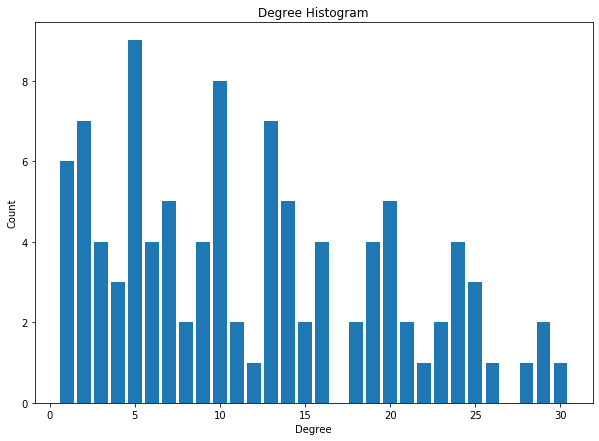

In [18]:
hist_of_degree_distr(G) 

In [19]:
#loglog_scale(G) #эта ячейка отрисовывает degree distribution без линейной регрессии

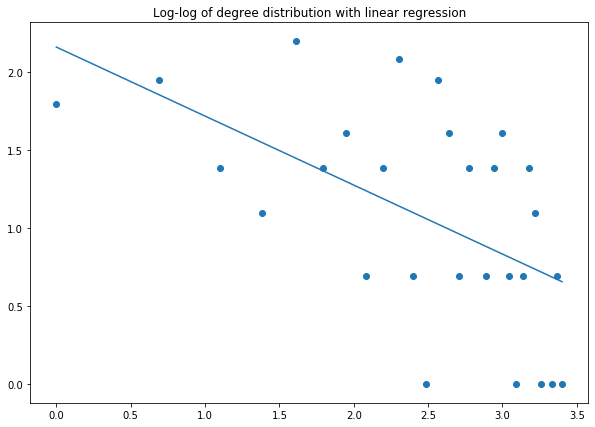

In [20]:
loglog_and_lin_regression(G)

In [21]:
def centralities(g):
    centralities_df = pd.DataFrame({
        'degree_centrality' : nx.degree_centrality(g),
        'closeness_centrality' : nx.closeness_centrality(g),
        'eigenvector_centrality' : nx.eigenvector_centrality_numpy(g),
        'betweenness_centrality' : nx.betweenness_centrality(g),
    })
    return centralities_df

In [22]:
#почему-то обычный nx.eigenvector_centrality не работает, ориентируясь на stackoverflow нашёл такой 
#(https://stackoverflow.com/questions/43208737/using-networkx-to-calculate-eigenvector-centrality) вариант решения
#но без библиотеки scipy он не работает, так что
#!pip install scipy

In [23]:
centralities_df = centralities(G)

In [24]:
centralities_df.head()

degree_centrality  closeness_centrality  \
Анна Ковалова                      0.10              0.297619   
Юлия Козицкая                      0.06              0.288184   
Елизавета Сенаторова               0.29              0.387597   
Елизавета Орлова                   0.18              0.370370   
Надежда Шмулевич                   0.14              0.303951   

                      eigenvector_centrality  betweenness_centrality  
Анна Ковалова                       0.008313                0.003191  
Юлия Козицкая                       0.003956                0.000115  
Елизавета Сенаторова                0.033725                0.078010  
Елизавета Орлова                    0.026386                0.027002  
Надежда Шмулевич                    0.012379                0.008873

In [45]:
set_figsize=(25, 22)

In [46]:
def draw_graph_with_different_nodes(g, centrality_list):
    pos = nx.kamada_kawai_layout(g)
    plt.figure(figsize=set_figsize)
    g_edges = nx.draw_networkx_edges(g, pos,
                                     edge_color = 'grey',
                                     alpha = 0.5,)
    g_nodes = nx.draw_networkx_nodes(g, pos, 
                                     node_size=list([i*2000 for i in centrality_list]),
                                     node_color=centrality_list,
                                     cmap=plt.cm.magma,)
    g_labels = nx.draw_networkx_labels(g, pos, alpha = 0.8,)
    plt.colorbar(g_nodes)

In [47]:
betweenness = list(centralities_df['betweenness_centrality'])
closeness = list(centralities_df['closeness_centrality'])
eigenvector = list(centralities_df['eigenvector_centrality'])
degree = list(centralities_df['degree_centrality'])

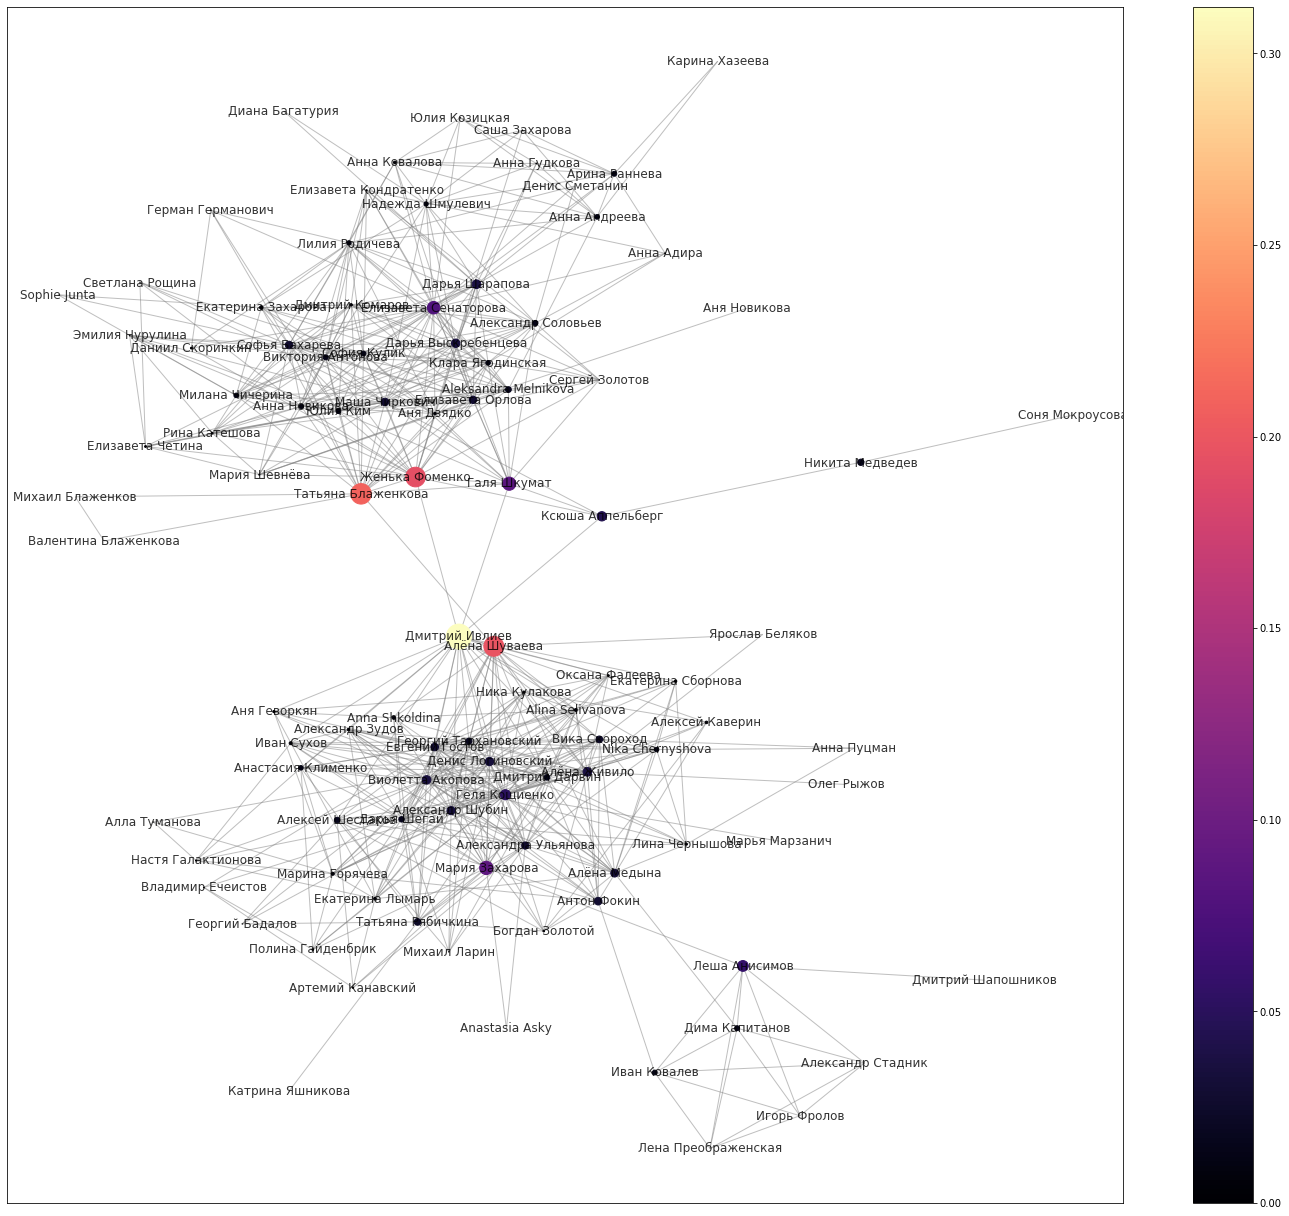

In [48]:
draw_graph_with_different_nodes(G, betweenness) #betweenness centrality

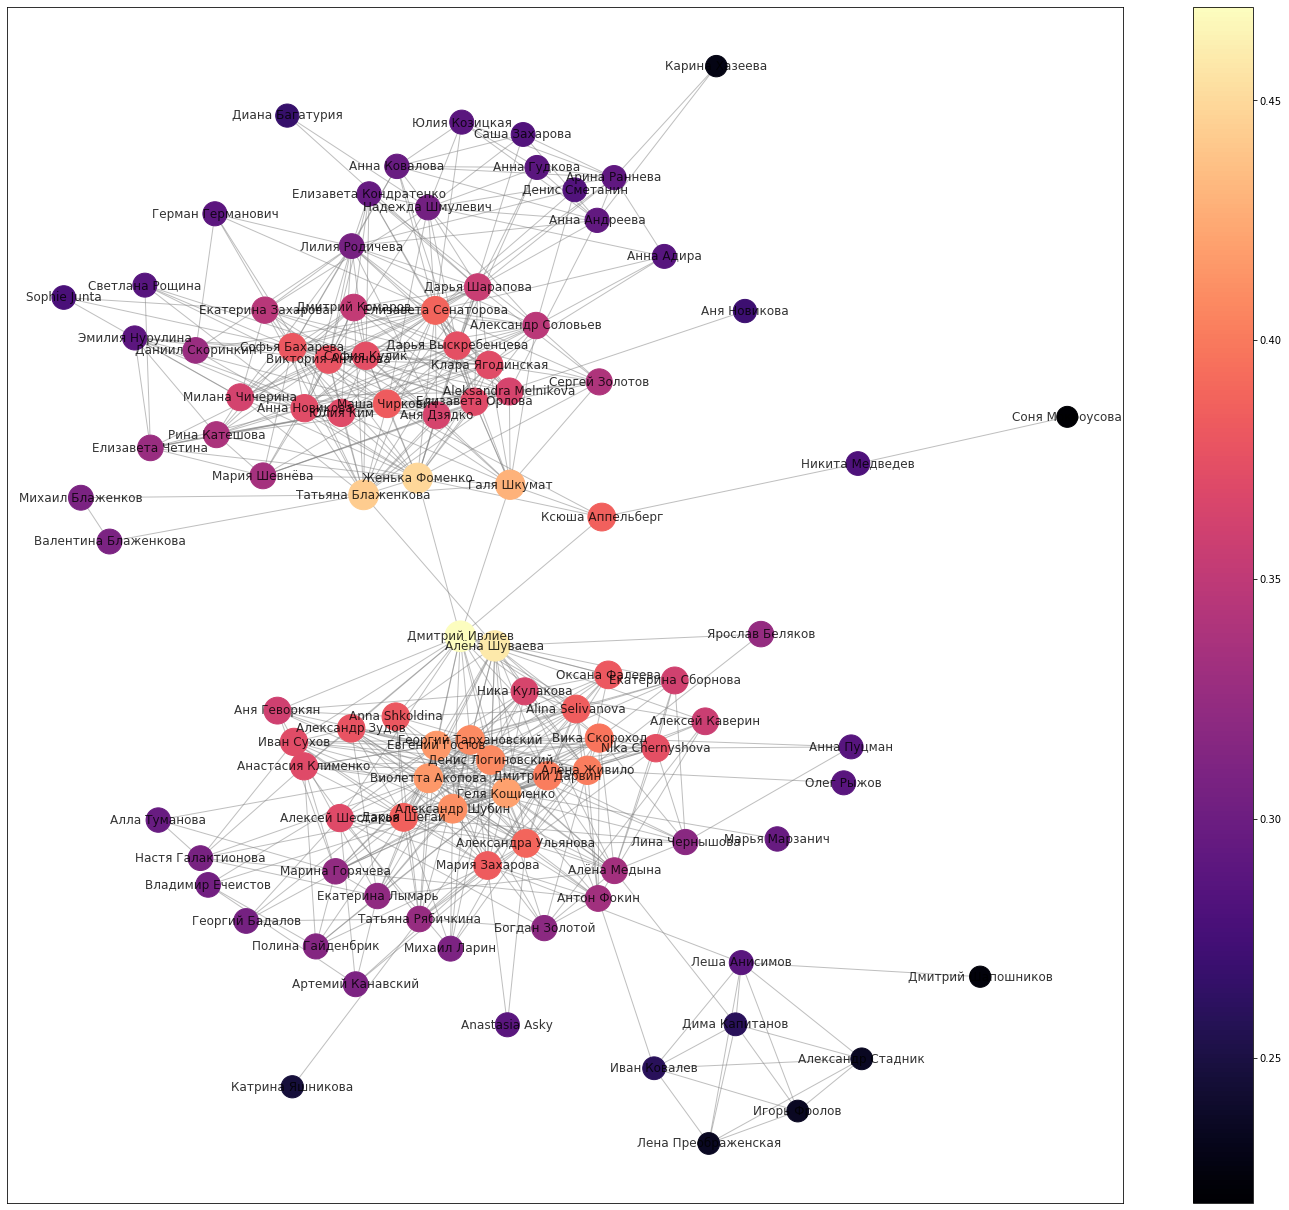

In [49]:
draw_graph_with_different_nodes(G, closeness) #closeness centrality

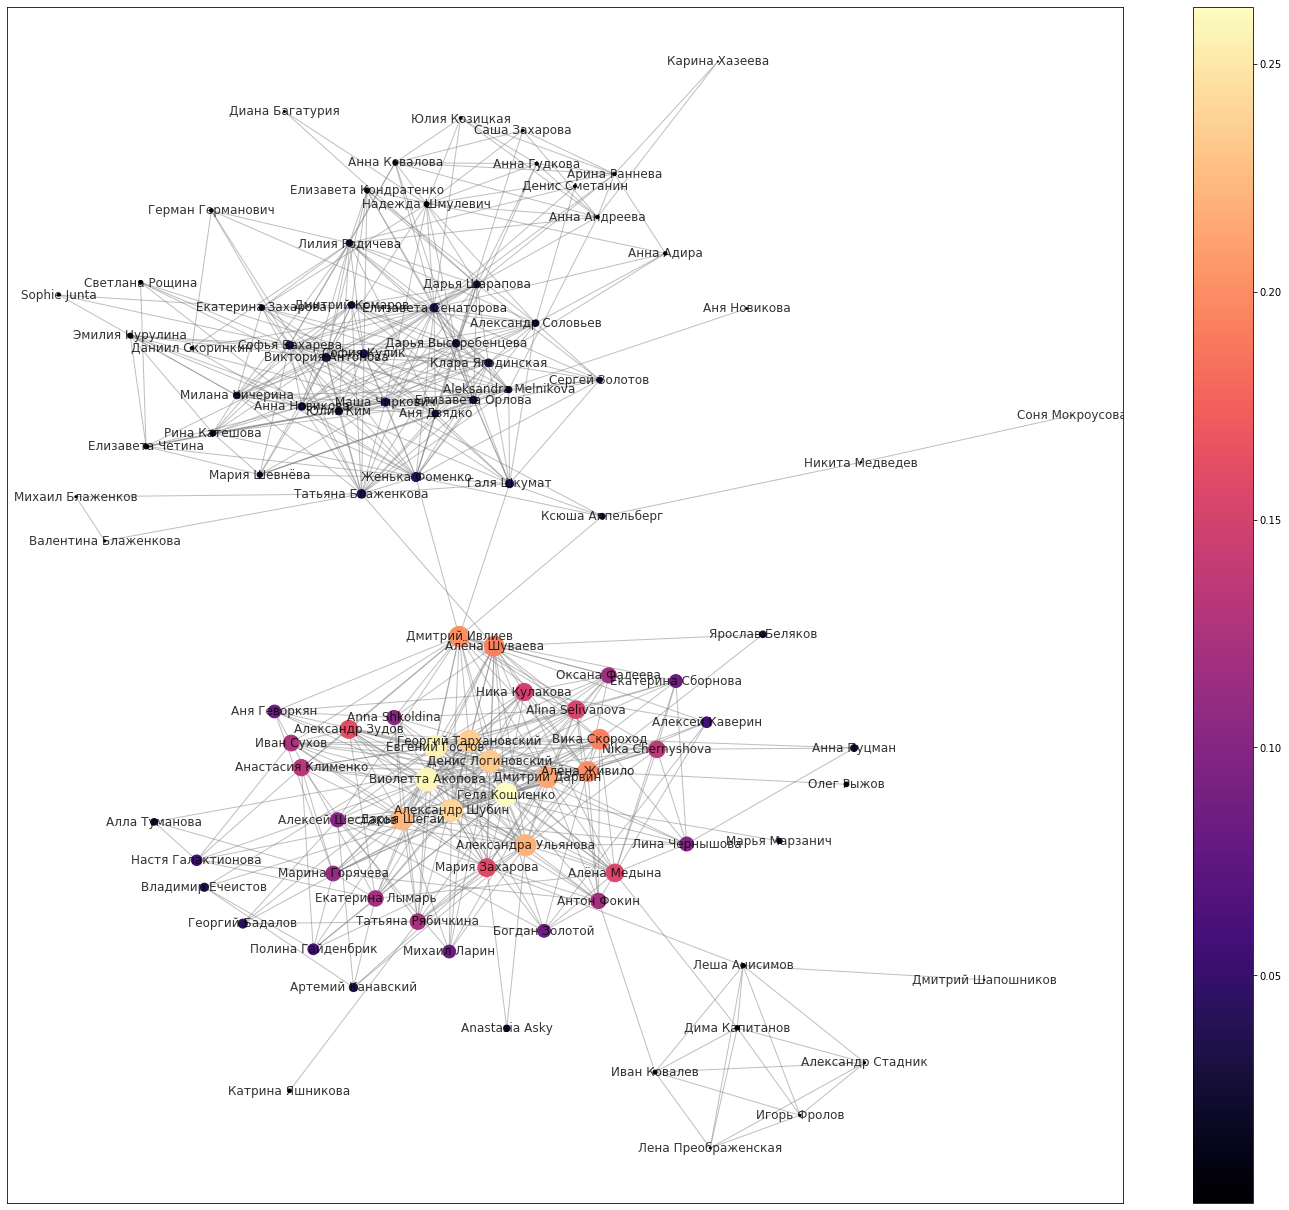

In [50]:
draw_graph_with_different_nodes(G, eigenvector) #eigenvector centrality

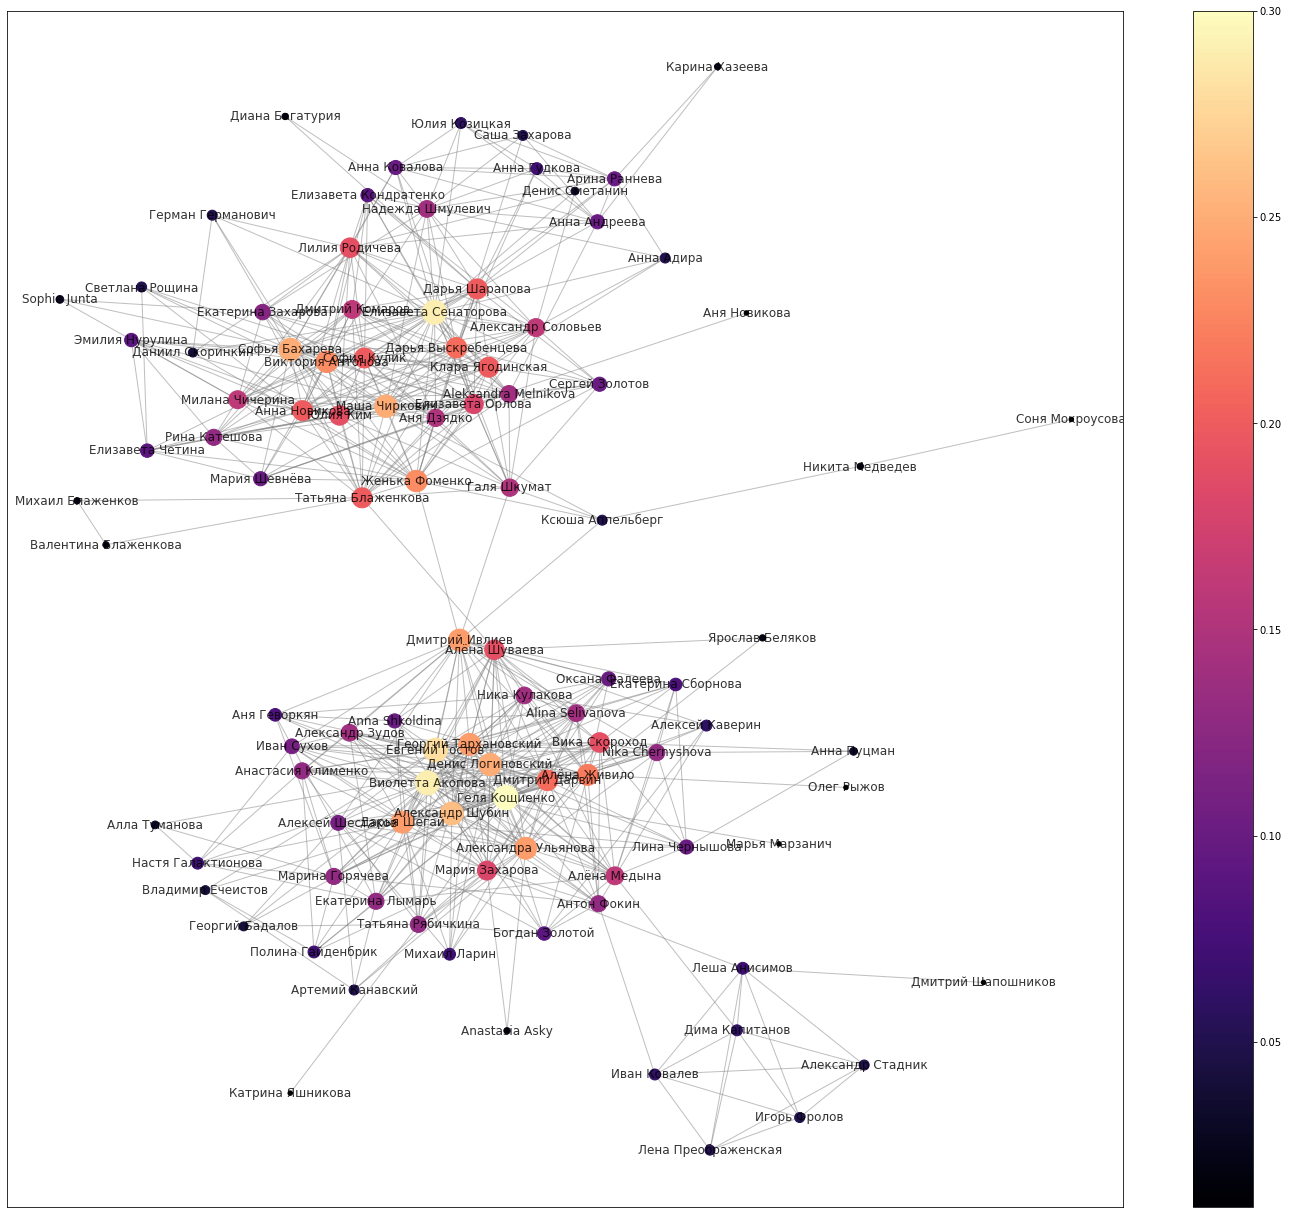

In [51]:
draw_graph_with_different_nodes(G, degree) #degree centrality

In [57]:
comp = girvan_newman(G)
res = {i:words for i, words in enumerate(tuple(sorted(c) for c in next(comp)))}

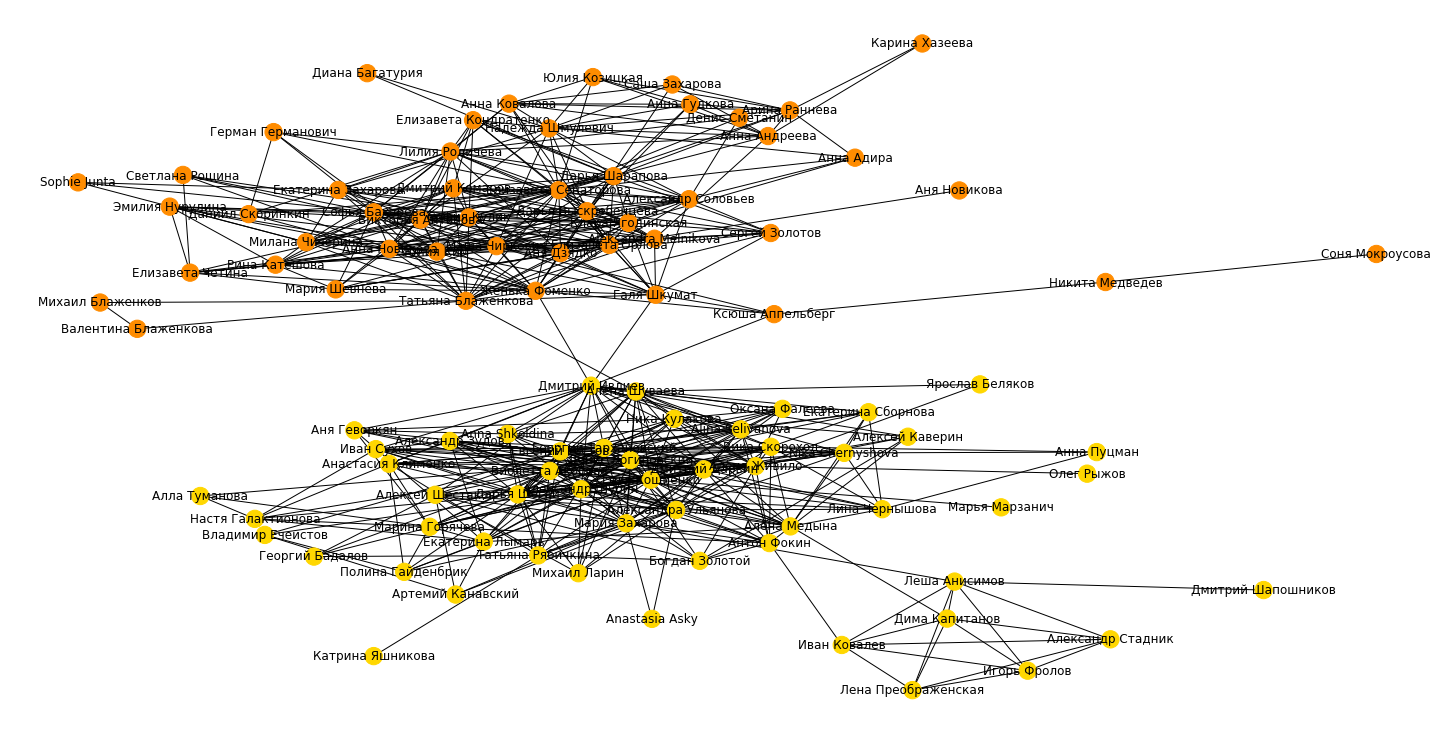

In [59]:
subset_color = [
    "gold",
    "violet",
    "limegreen",
    "darkorange",
]
color = [ ]
for v in G.nodes():
    for i, words in res.items():
        if v in words:
            color.append(subset_color[i-1])
plt.figure(figsize=(20, 10))

nx.draw(G, pos, node_color=color, with_labels=True)
plt.show()

Сообществ: 4
Модулярность: 0.5257240538183905


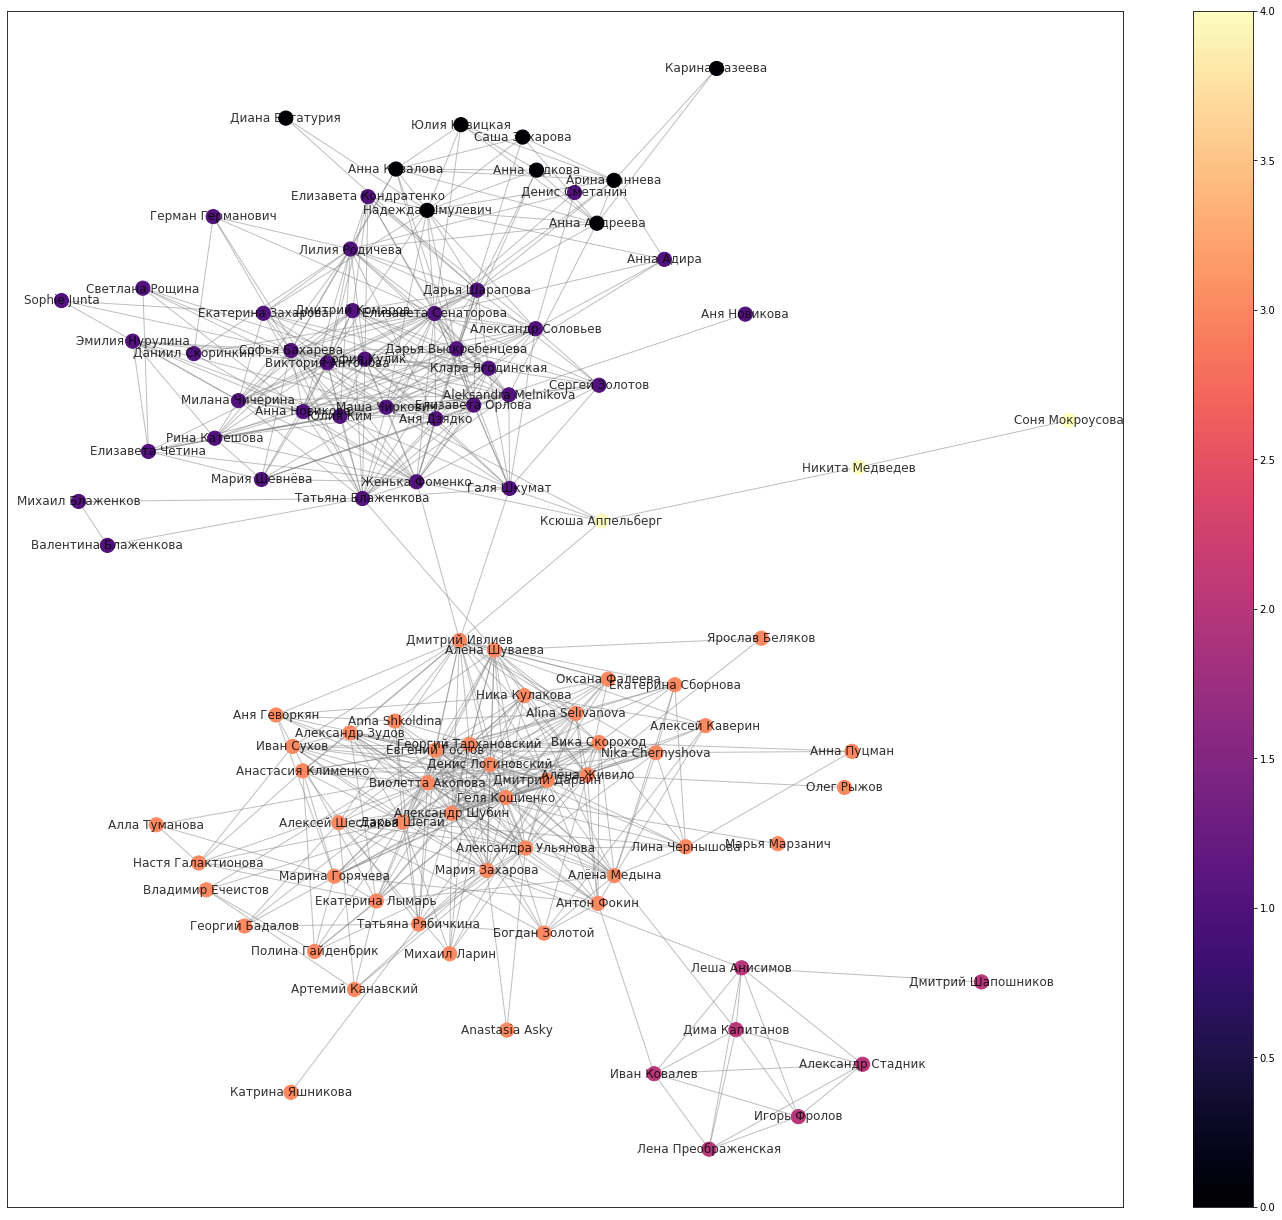

In [61]:
best_partition = community_louvain.best_partition(G)
modularity = community_louvain.modularity(best_partition, G)

print('Сообществ: {}'.format(max(best_partition.values())))
print('Модулярность: {}'.format(modularity))
pos = nx.kamada_kawai_layout(G)
plt.figure(figsize=set_figsize)
g_edges = nx.draw_networkx_edges(G, pos,
                                     edge_color = 'grey',
                                     alpha = 0.5,)
g_nodes = nx.draw_networkx_nodes(G, pos, 
                                     node_size=200,
                                     node_color=list(best_partition.values()),
                                     cmap=plt.cm.magma,)
g_labels = nx.draw_networkx_labels(G, pos, alpha = 0.8,)
g_colors = plt.colorbar(g_nodes)